<a href="https://colab.research.google.com/github/TheEvergreenStateCollege/week-2-hunter-a1/blob/main/babynamesCh7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
baby2020 = pd.read_csv('yob2020.txt')
baby2020.head()
# another possibility: https://github.com/PhantomInsights/baby-names-analysis

,Olivia,F,17535
0,Emma,F,15581
1,Ava,F,13084
2,Charlotte,F,13003
3,Sophia,F,12976
4,Amelia,F,12704


In [15]:
baby2020.columns = ["Name", "Gender", "Count"]
baby2020.head()

,Name,Gender,Count
0,Emma,F,15581
1,Ava,F,13084
2,Charlotte,F,13003
3,Sophia,F,12976
4,Amelia,F,12704


In [17]:
baby2019 = pd.read_csv('yob2019.txt')
baby2019.columns = ["Name", "Gender", "Count"]
baby2019.head()

,Name,Gender,Count
0,Emma,F,17155
1,Ava,F,14474
2,Sophia,F,13753
3,Isabella,F,13344
4,Charlotte,F,13191


In [22]:
baby = baby2019
baby.head()

,Name,Gender,Count,Year
0,Emma,F,17155,2019
1,Ava,F,14474,2019
2,Sophia,F,13753,2019
3,Isabella,F,13344,2019
4,Charlotte,F,13191,2019


In [25]:
baby2020["Year"]=2020
baby2020.head()

,Name,Gender,Count,Year
0,Emma,F,15581,2020
1,Ava,F,13084,2020
2,Charlotte,F,13003,2020
3,Sophia,F,12976,2020
4,Amelia,F,12704,2020


In [31]:
baby = baby.append(baby2020)
baby

,Name,Gender,Count,Year
0,Emma,F,17155,2019
1,Ava,F,14474,2019
2,Sophia,F,13753,2019
3,Isabella,F,13344,2019
4,Charlotte,F,13191,2019
...,...,...,...,...
31265,Zykell,M,5,2020
31266,Zylus,M,5,2020
31267,Zymari,M,5,2020
31268,Zyn,M,5,2020


In [32]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)
baby.to_sql('babySQL', con=engine)

In [33]:
query = """
SELECT *
FROM babySQL;
"""
pd.read_sql(query,engine)

,index,Name,Gender,Count,Year
0,0,Emma,F,17155,2019
1,1,Ava,F,14474,2019
2,2,Sophia,F,13753,2019
3,3,Isabella,F,13344,2019
4,4,Charlotte,F,13191,2019
...,...,...,...,...,...
94564,31265,Zykell,M,5,2020
94565,31266,Zylus,M,5,2020
94566,31267,Zymari,M,5,2020
94567,31268,Zyn,M,5,2020


In [36]:
query = """
SELECT Year, Gender, MAX(Count), MAX(Name)
FROM babySQL
GROUP BY Year, Gender
"""
pd.read_sql(query,engine)

,Year,Gender,MAX(Count),MAX(Name)
0,2019,F,17155,Zyva
1,2019,M,20555,Zyrus
2,2020,F,15581,Zyva
3,2020,M,19659,Zyrus


In [55]:
query = """
SELECT Year, Gender, MAX(Count), Name
FROM babySQL
GROUP BY Year, Gender
"""
pd.read_sql(query,engine)

,Year,Gender,MAX(Count),Name
0,2019,F,17155,Emma
1,2019,M,20555,Liam
2,2020,F,15581,Emma
3,2020,M,19659,Liam


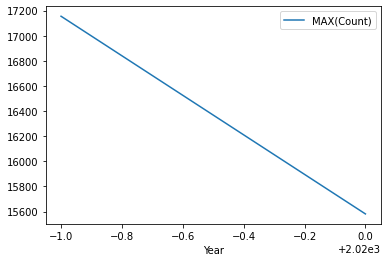

In [57]:
query = """
SELECT Year, Gender, MAX(Count), Name
FROM babySQL
WHERE Gender = 'F'
GROUP BY Year, Gender
"""
pd.read_sql(query,engine).plot('Year', 'MAX(Count)')

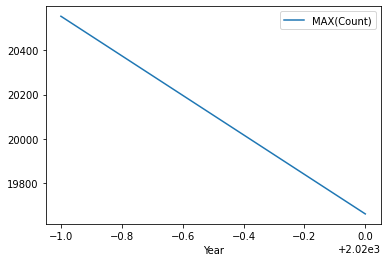

In [58]:
query = """
SELECT Year, Gender, MAX(Count), Name
FROM babySQL
WHERE Gender = 'M'
GROUP BY Year, Gender
"""
pd.read_sql(query,engine).plot('Year', 'MAX(Count)')

In [50]:
query = """
SELECT Year, Gender, Count, Name
FROM babySQL
WHERE Name = 'Liam';
"""
pd.read_sql(query,engine)

,Year,Gender,Count,Name
0,2019,F,30,Liam
1,2019,M,20555,Liam
2,2020,F,31,Liam
3,2020,M,19659,Liam
4,2020,F,31,Liam
5,2020,M,19659,Liam


In [51]:
query = """
SELECT Year, Gender, Count, Name
FROM babySQL
WHERE Name = 'Liam';
"""
pd.read_sql(query,engine)

,Year,Gender,Count,Name
0,2019,F,30,Liam
1,2019,M,20555,Liam
2,2020,F,31,Liam
3,2020,M,19659,Liam
4,2020,F,31,Liam
5,2020,M,19659,Liam


In [35]:
baby.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94569 entries, 0 to 31269
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    94569 non-null  object
 1   Gender  94569 non-null  object
 2   Count   94569 non-null  int64 
 3   Year    94569 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.6+ MB


In [62]:
query = """
SELECT Year, SUM(Count)
FROM babySQL
"""
pd.read_sql(query,engine)

,Year,SUM(Count)
0,2020,10012886


In [72]:
total2019 = baby[baby['Year']==2019]['Count'].sum()
total2019

3437438

In [74]:
total2020 = baby[baby['Year']==2020]['Count'].sum()
total2020

6575448